In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm, gaussian_kde, gamma
from statsmodels.distributions.copula.api import ClaytonCopula

# Exercise1:

### part a):

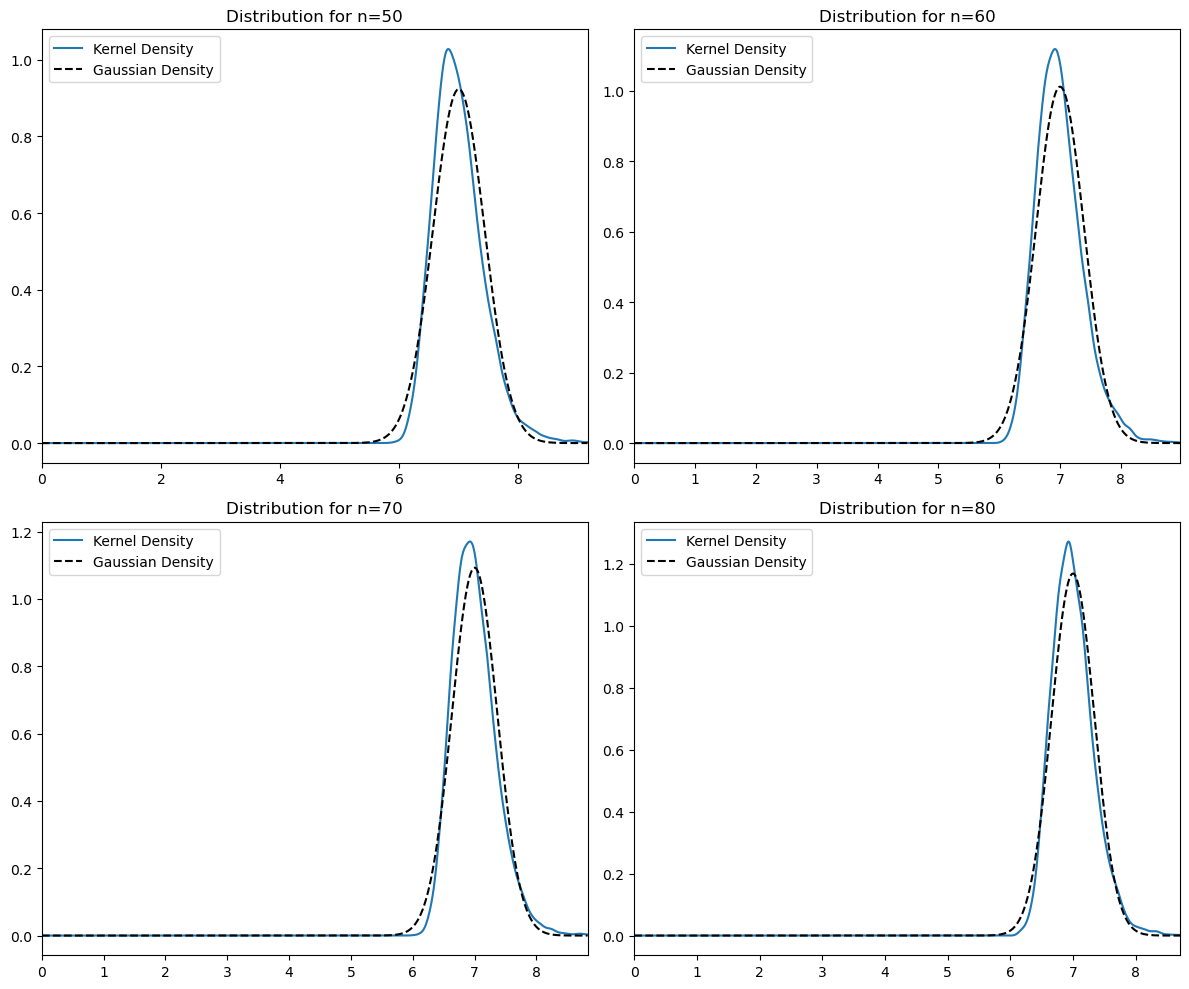

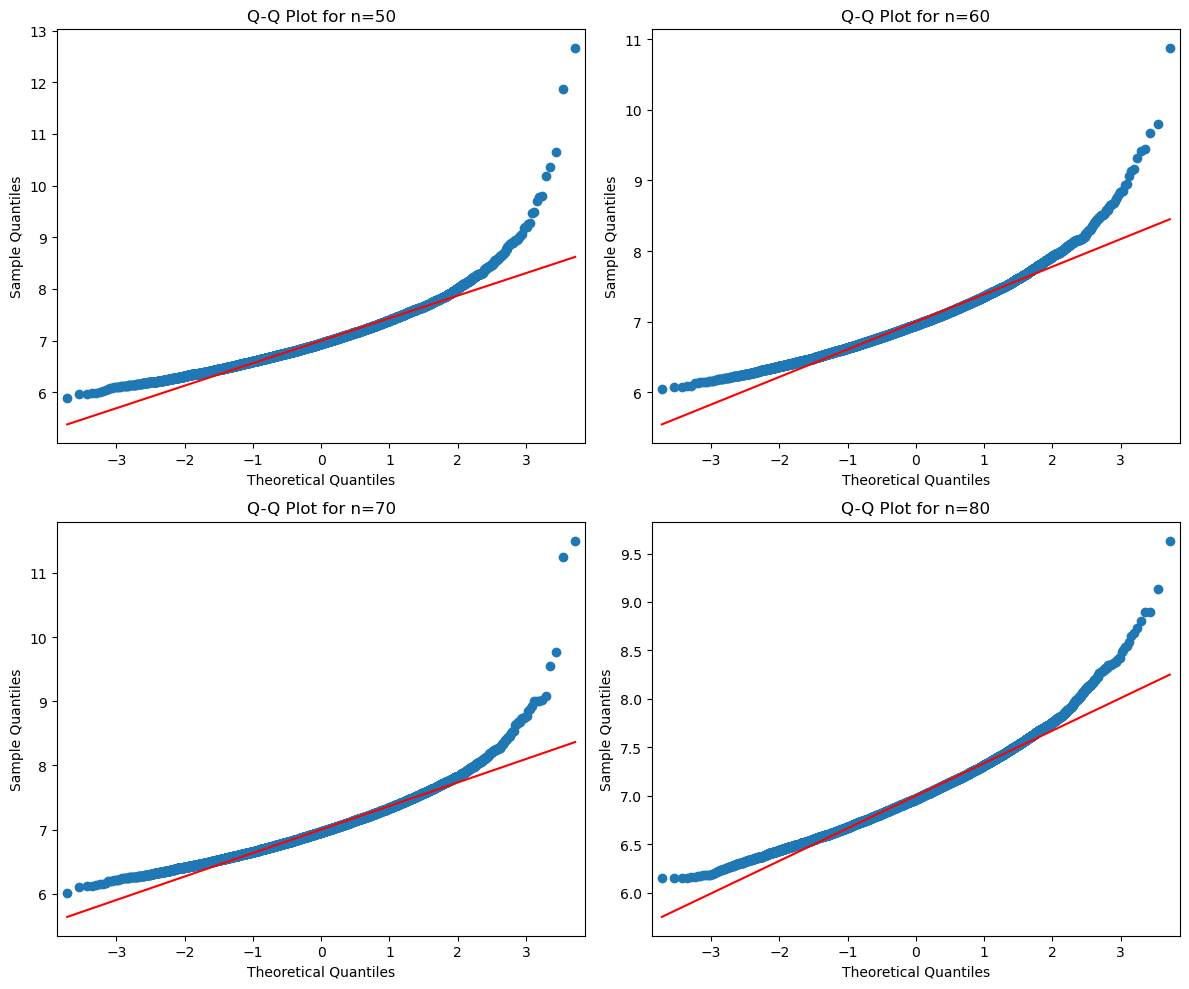

In [2]:
# Parameters of the Pareto distribution
alpha = 3.5  # Shape parameter
c = 5  # Scale parameter

# Moments of the Pareto distribution
mu = alpha * c / (alpha - 1)  # Mean
var = alpha * c**2 / ((alpha - 2) * (alpha - 1)**2)  # Variance

# Sample sizes and Monte Carlo repetitions
sample_sizes = [50, 60, 70, 80]
repetitions = 10000  # Number of Monte Carlo repetitions

# Quantile function of the Pareto distribution
pareto_quantile = lambda p: c * (1 - p)**(-1 / alpha)

# Create figures for density plots and Q-Q plots
fig_density, axes_density = plt.subplots(2, 2, figsize=(12, 10))
fig_qq, axes_qq = plt.subplots(2, 2, figsize=(12, 10))

for idx, sample_size in enumerate(sample_sizes):
    # Generate Pareto samples
    random_uniform = np.random.rand(repetitions, sample_size)
    samples = pareto_quantile(random_uniform)
    
    # Compute sample means
    sample_means = np.mean(samples, axis=1)
    
    # Kernel density estimate for sample means
    kde = gaussian_kde(sample_means)
    x_vals = np.linspace(0, mu + 5 * np.sqrt(var / sample_size), 1000)
    density_vals = kde(x_vals)
    
    # Gaussian density with matching moments
    gaussian_density = norm.pdf(
        x_vals, 
        loc=mu, 
        scale=np.sqrt(var / sample_size)
    )
    
    # Plot density and overlay Gaussian
    ax_dens = axes_density[idx // 2, idx % 2]
    ax_dens.plot(x_vals, density_vals, label='Kernel Density')
    ax_dens.plot(x_vals, gaussian_density, 'k--', label='Gaussian Density')
    ax_dens.set_xlim(0, mu + 5 * np.sqrt(var / sample_size))
    ax_dens.set_title(f'Distribution for n={sample_size}')
    ax_dens.legend()
    
    # Q-Q plot
    ax_qq = axes_qq[idx // 2, idx % 2]
    sm.qqplot(sample_means, line='s', ax=ax_qq)
    ax_qq.set_title(f'Q-Q Plot for n={sample_size}')

# Adjust layout for plots
fig_density.tight_layout()
fig_qq.tight_layout()
plt.show()

### part b):

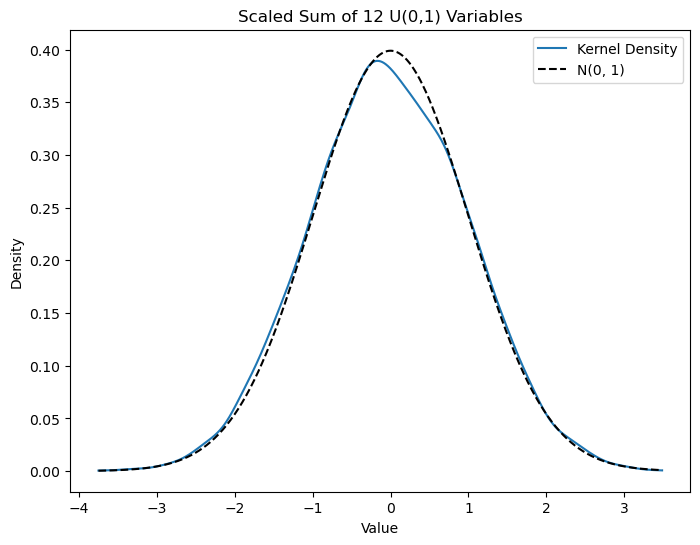

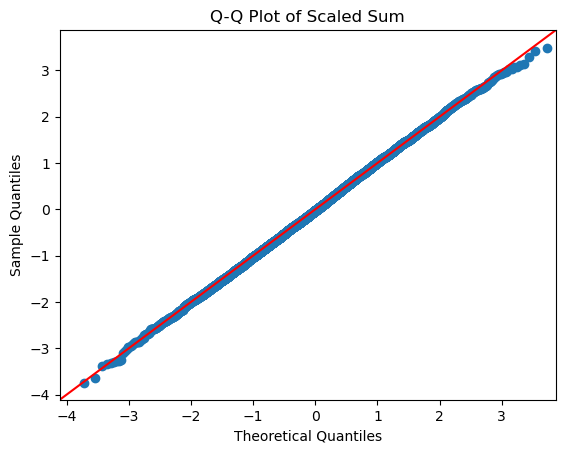

In [3]:
# Generate scaled sum of 12 U(0,1) variables
# The scaling: Y = 12 * mean - 6
Y_samples = 12 * np.mean(np.random.rand(repetitions, 12), axis=1) - 6

# Plot the kernel density estimate
plt.figure(figsize=(8, 6))
kde = gaussian_kde(Y_samples)
x_vals = np.linspace(min(Y_samples), max(Y_samples), 1000)
y_vals = kde(x_vals)

# Kernel density plot
plt.plot(x_vals, y_vals, label='Kernel Density')

# Overlay Gaussian density with mean=0 and std=1
plt.plot(x_vals, norm.pdf(x_vals, 0, 1), 'k--', label='N(0, 1)')
plt.title('Scaled Sum of 12 U(0,1) Variables')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# Q-Q Plot
sm.qqplot(Y_samples, line='45')
plt.title('Q-Q Plot of Scaled Sum')
plt.show()

# Exercise 2: generate copula samples

In [4]:
# Parameters
sample_size = 1000  # Sample size
theta = 2.5  # Clayton copula parameter

# i) Inversion method
# np.random.seed(123)
U1 = np.random.rand(sample_size, 2)
U1[:, 1] = ((U1[:, 1] ** (-theta / (theta + 1))) * U1[:, 0] ** (-theta) - U1[:, 0] ** (-theta) + 1) ** (-1 / theta)

# ii) Marshall-Olkin algorithm
np.random.seed(123)
V_samples = gamma.rvs(1 / theta, scale=1, size=sample_size)
U2 = np.random.rand(sample_size, 2)
U2 = (1 - np.log(U2) / V_samples.reshape(sample_size, 1))**(-1 / theta)

clayton = ClaytonCopula(theta=theta, k_dim=2)
U3 = clayton.rvs(sample_size)

/opt/conda/lib/python3.11/site-packages/statsmodels/tools/rng_qrng.py:54: FutureWarning: Passing `None` as the seed currently return the NumPy singleton RandomState
(np.random.mtrand._rand). After release 0.13 this will change to using the
default generator provided by NumPy (np.random.default_rng()). If you need
reproducible draws, you should pass a seeded np.random.Generator, e.g.,

import numpy as np
seed = 32839283923801
rng = np.random.default_rng(seed)"

  warnings.warn(_future_warn, FutureWarning)


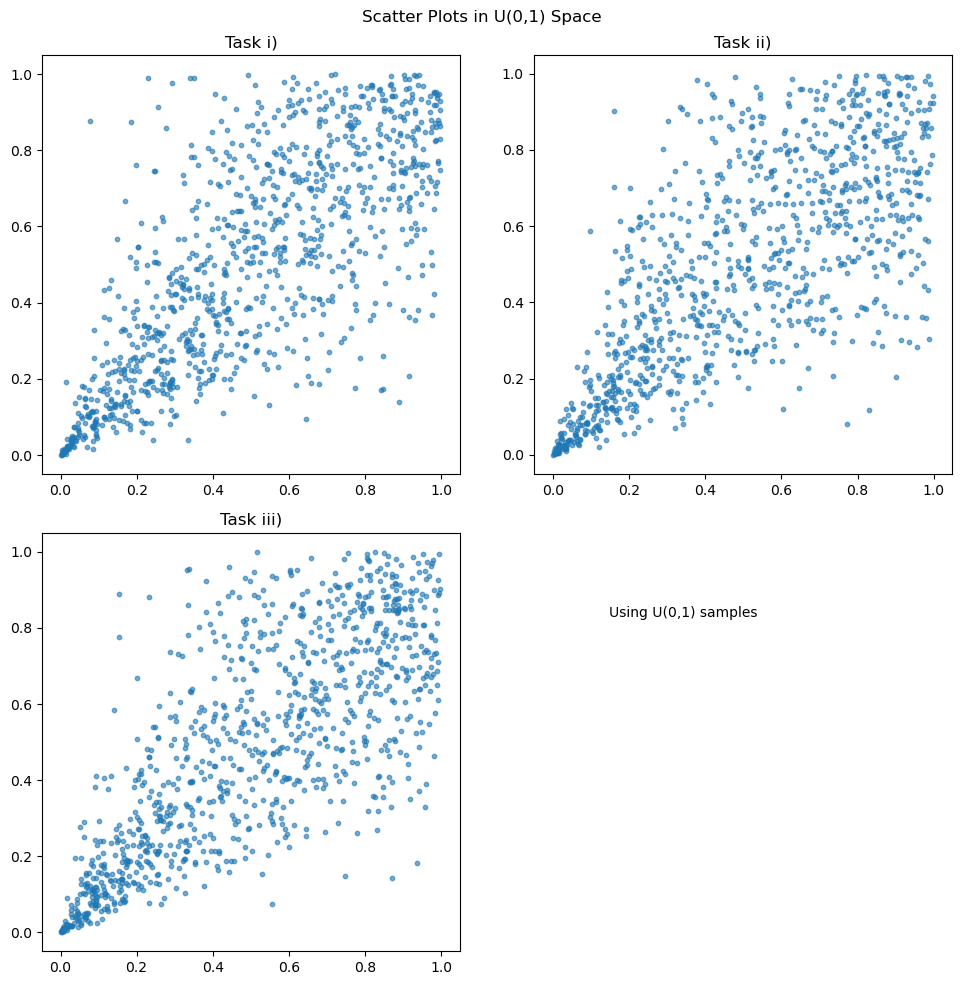

In [5]:
# Plot scatter plots
fig1, axes1 = plt.subplots(2, 2, figsize=(10, 10))
fig1.suptitle("Scatter Plots in U(0,1) Space")
labels = ['i)', 'ii)', 'iii)']
datasets = [U1, U2, U3]

for i, (U, label) in enumerate(zip(datasets, labels)):
    ax = axes1.flat[i]
    ax.scatter(U[:, 0], U[:, 1], alpha=0.6, s=10)
    ax.axis("square")
    ax.set_title(f"Task {label}")

axes1.flat[-1].text(0.2, 0.8, "Using U(0,1) samples", transform=axes1.flat[-1].transAxes)
axes1.flat[-1].axis("off")

plt.tight_layout()
plt.show()

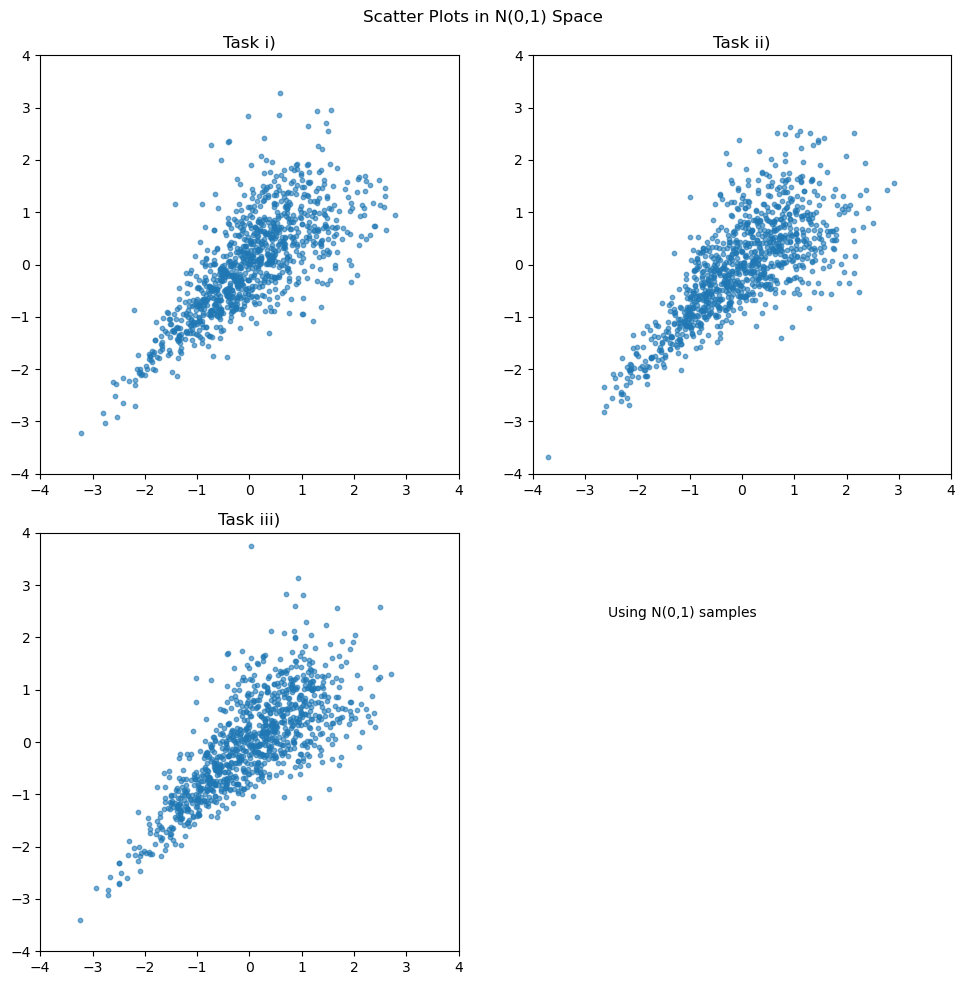

In [6]:
# Plot scatter plots in N(0,1) space
fig2, axes2 = plt.subplots(2, 2, figsize=(10, 10))
fig2.suptitle("Scatter Plots in N(0,1) Space")

for i, (U, label) in enumerate(zip(datasets, labels)):
    ax = axes2.flat[i]
    ax.scatter(norm.ppf(U[:, 0]), norm.ppf(U[:, 1]), alpha=0.6, s=10)
    ax.axis("square")
    ax.set_title(f"Task {label}")
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)

axes2.flat[-1].text(0.2, 0.8, "Using N(0,1) samples", transform=axes2.flat[-1].transAxes)
axes2.flat[-1].axis("off")

plt.tight_layout()
plt.show()